# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(f'/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

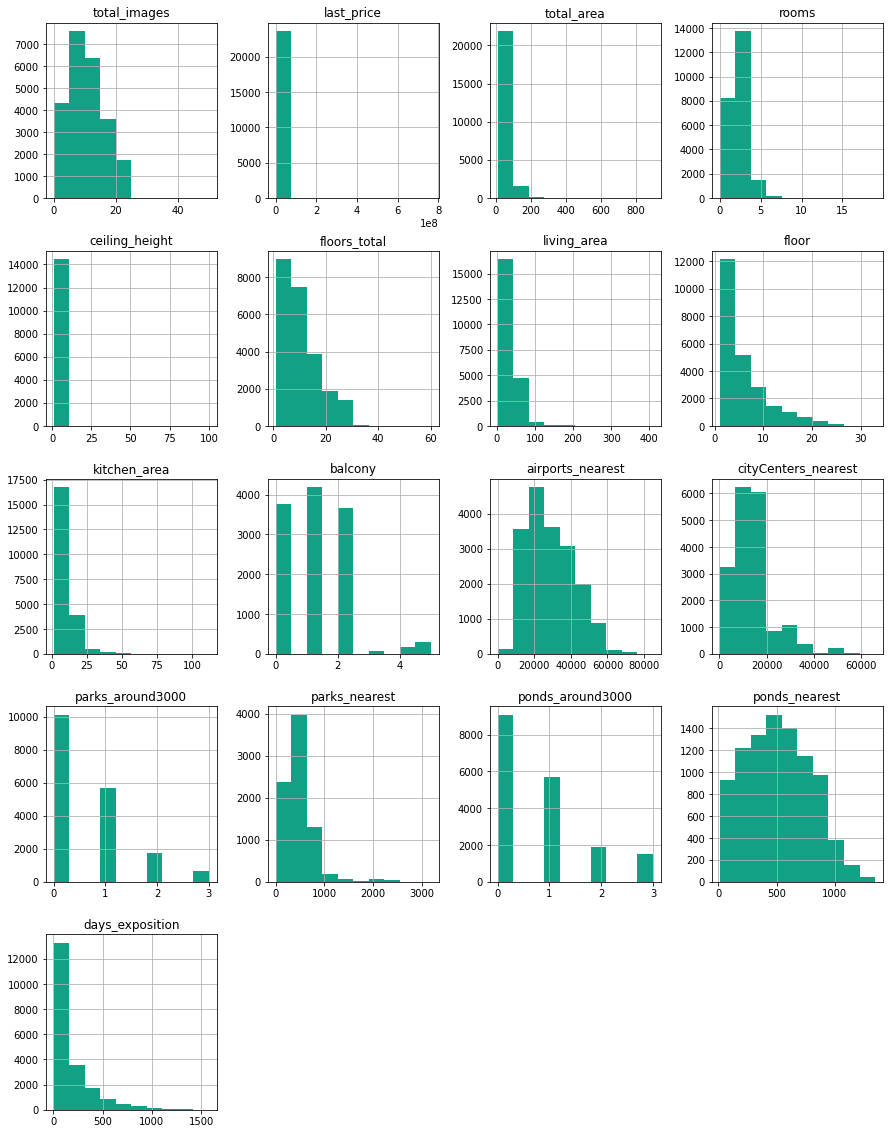

In [5]:
data.hist(figsize=(15, 20), color='#12a184');

С первого взгляда мы видим большое количество пропусков в данных, в столбце "is_apartment" в превью датафрейма нет ни одного заполненного значения. Также мы видим большое количество пропусков в столбцах: "ceiling_height", "balcony", "city_centers_nearest", "parks_around3000", "parks_nearest", "ponds_around3000", "ponds_nearest" и др.

В информации о датафрейме, мы видим, что некоторые столбцы имеют некорректный тип данных, столбец "cityCenters_nearest" нуждается в переименовке, для приведения к единому стилю.

Можно подвести итог, что прежде чем проводить аналитику данного датасета, предворительно следует сделать предобработку данных.

### Предобработка данных

In [6]:
data = data.rename(columns= {'cityCenters_nearest' : 'city_centers_nearest' }) #переименуем колонку чтобы все было в едином стиле

In [7]:
data.isna().sum() #определяем пропущенные значения

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

---
***Обработка пропущенных значений***

Пропуски связанные с населённым пунктом проще всего заполнить строчкой "неизвестно", так как мы не можем знать, что за населенный пункт должен был быть указан.

In [8]:
data['locality_name'] = data['locality_name'].fillna('unknown') #название населённого пункта

Пропуски в столбце "высота потолков" заменим на медианное значение.

In [9]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #высота потолков (м)

Пропуски связанные с количеством этажей в доме логичнее всего заполнить медианным значением по населенному пункту.


In [10]:
data['floors_total'] = data['floors_total'].fillna(data['floor']) 

Пропуски в столбце "апартаменты" скорее всего связаны с тем, что поле не является обязательным для заполнения. Так как этот статус не влияет на качество жилья.

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False) #является ли площадь апартаментами

Чтобы максимально точно заменить пропуски в столбце "жилая площадь" нам нужно найти отношение столбца "жилой площади" к "общей площади", а затем поделить "общую площадь" на медиану этих отношений по населенному пункту:

In [12]:
area_data_slice = data[['living_area','total_area','locality_name']].copy() #создаем отдельный датафрейм с нужными столбцами

area_data_slice['area_attitude'] = area_data_slice['living_area'] / area_data_slice['total_area'] #создаем столбец отношения жилой площади к общей площади

for t in data['locality_name'].unique(): #заполним пропуски в столбце жилой площади, умножив общую площадь на медиану отношений этих площадей по населенному пункту
    data.loc[(data['locality_name'] == t) & (data['living_area'].isna()), 'living_area'] = \
     data['total_area'].multiply(area_data_slice.loc[(area_data_slice['locality_name'] == t), 'area_attitude'].mean())   

Аналогично поступим с площадью кухни:

In [13]:
area_data_slice = data[['kitchen_area','total_area','locality_name']].copy() #создаем отдельный датафрейм с нужными столбцами

area_data_slice['area_attitude'] = area_data_slice['kitchen_area'] / area_data_slice['total_area'] #создаем столбец отношения площади кухни к общей площади

for t in data['locality_name'].unique(): #заполним пропуски в столбце площади кухни, умножив общую площадь на медиану отношений этих площадей по населенному пункту
    data.loc[(data['locality_name'] == t) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
     data['total_area'].multiply(area_data_slice.loc[(area_data_slice['locality_name'] == t), 'area_attitude'].mean())   

Скорее всего пропуски в столбце "наличие балкона" говорит нам о том, что люди не указывают балкон так как в доме их нет. Поэтому заменим пропуски нулём.

In [14]:
data['balcony'] = data['balcony'].fillna(0) #наличие балкона

In [15]:
data.isna().sum() #смотрим результат работы

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                17
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area               19
balcony                     0
locality_name               0
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

---
***Изменены типы данных***

In [16]:
data.dtypes #посмотрим типы всех столбцов

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
city_centers_nearest    float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

Для того чтобы привести код в аккуртный вид чтобы нам было с ним удобнее работать, нужно изменить типы столбцов на надлежащее ему. Например чтобы проще было проводить расчеты со временем, нужно привести стобец c датой в тип 'date_time'. Количество этажей является всегда целым числом, поэтому этот столбец приведём к 'int', и точно также поступим с количеством балконов.

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') #приводим время к типу datetime
data['floors_total'] = data['floors_total'].astype('int') #приводим количество этажей к типу int т.к. это будет целое число
data['balcony'] = data['balcony'].astype('int')  #приводим количество балконов к типу int т.к. это будет целое число
data['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

---
Устранены неявные дубликаты в названиях населённых пунктов

In [1]:
data['locality_name'] = data['locality_name'].str.lower() #приведём строчки к нижниму регистру
data['locality_name'] = data['locality_name'].str.replace('ё','е') #заменим все ё на е для того чтобы в дальнейшем нам было удобно работать со строками
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace('поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок ', '')
data['locality_name'] = data['locality_name'].str.replace('село ', '')
data['locality_name'] = data['locality_name'].str.replace('деревня ', '') #также уберём все ненужные нам слова в строках, чтобы оставить только названия

data['locality_name'].unique()

NameError: name 'data' is not defined

Таким образом мы получили чистый список в которых остались лишь названия. Это даёт нам то, что "поселок мурино" и "поселок городского типа мурино" слились в одну ячейку и таким образом данные не дублируются.

---
***Устраняем редкие и выбивающиеся значения (аномалии)***

Возвращаемся к столбцу "высота потолков". Как я уже говорила ранее, там где значения слишком большие, скорее всего люди по случайности неправильно поставили точку. Чтобы решить эту проблему разделим слишком большие числа на 10, чтобы получить корректное значение.
Также есть и аномально низкие проставленные значения. Их природа не очень понятна, поэтому чтобы приблизиться к правде, можем просто добавить к слишком маленьким значениям +1.

In [54]:
data.loc[data['ceiling_height'] > 8, 'ceiling_height'] /= 10 #высота потолков (м)
data.loc[data['ceiling_height'] < 1.5, 'ceiling_height'] += 1
data['ceiling_height'].unique()

array([2.7 , 2.65, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 3.2 , 2.61, 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 4.15,
       3.5 , 3.3 , 2.71, 4.  , 2.47, 2.73, 2.84, 3.1 , 2.34, 3.4 , 3.06,
       2.72, 2.54, 2.51, 2.78, 2.76, 2.58, 3.7 , 2.52, 5.2 , 2.87, 2.66,
       2.59, 2.  , 2.45, 3.6 , 2.92, 3.11, 3.13, 3.8 , 3.15, 3.55, 3.16,
       3.62, 3.12, 2.53, 2.74, 2.96, 2.46, 5.3 , 5.  , 2.79, 2.95, 4.06,
       2.94, 3.82, 3.54, 3.53, 2.83, 4.7 , 2.4 , 3.38, 3.01, 5.6 , 3.65,
       3.9 , 3.18, 3.35, 2.3 , 3.57, 2.48, 2.62, 2.82, 3.98, 2.63, 3.83,
       3.52, 3.95, 3.75, 2.88, 3.67, 3.87, 3.66, 3.85, 3.86, 4.19, 3.24,
       4.8 , 4.5 , 4.2 , 3.36, 3.08, 3.68, 3.07, 3.37, 3.09, 8.  , 3.26,
       3.34, 2.81, 3.44, 2.97, 3.14, 4.37, 2.68, 3.22, 3.27, 4.1 , 2.93,
       3.46, 3.47, 3.33, 3.63, 3.32, 2.2 , 1.83, 2.98, 2.86, 3.17, 4.4 ,
       3.28, 3.04, 4.45, 5.5 , 3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 4.3 ,
       3.39, 2.69, 3.31, 4.65, 3.56, 3.51, 3.93, 3.

Заменим слишком маленькие значения в размерах жилой комнаты на медианные, и если жилая площадь больше общей то заменим на медианное значение по населенному пункту

In [20]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & ((data['living_area'] < 15) | (data['living_area'] > data['total_area'])), 'living_area'] = \
    data.loc[(data['locality_name'] == t), 'living_area'].mean() 

Уберём недвижимость со слишком большой площадью, заменим такие значения на медианные:

In [21]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name'] == t) & (data['total_area'] > 600), 'total_area'] = \
    data.loc[(data['locality_name'] == t), 'total_area'].median() 
data['total_area'].unique().max()

590.0

Посчитаем средний метраж комнат по разным городам, и сравним количество комнат в объявлениях  с их площадью и скорректируем аномальные значения в стобце "количество комнат"

In [22]:
rooms_area_attitude_by_locality_name = {}

for t in data['locality_name'].unique(): # создали список со среднем метражем комнат по населенным пунктам в зависимости от общей площади
    rooms_area_attitude_by_locality_name[t] = (data.loc[data['locality_name'] == t , 'total_area'] / data.loc[data['locality_name'] == t, 'rooms']).median()

for t in data['locality_name'].unique(): # заменили сильно отличающиеся по критерию (общая площадь \ количество комнат)
    data.loc[(data['locality_name'] == t) & \
             (data['total_area'].div(data['rooms']) < (rooms_area_attitude_by_locality_name[t] * 0.7)), 'rooms'] = (data['total_area'].div(rooms_area_attitude_by_locality_name[t]))

rooms_area_attitude_by_locality_name #средний метраж комнат по городам и населенным пунктам
data['rooms'] = data['rooms'].round() #округление количества комнат
data['rooms'].unique()

array([ 3.,  1.,  2.,  4.,  5.,  6.,  0.,  7.,  8., 14., 10., 15.,  9.,
       12.])

### Посчитайте и добавьте в таблицу новые столбцы

In [23]:
# цена одного квадратного метра
data['square_meter_price'] = data['last_price'] / data['total_area']
data['square_meter_price']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: square_meter_price, Length: 23699, dtype: float64

In [24]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['publication_day'] = data['first_day_exposition'].dt.dayofweek
data['publication_day']

0        3
1        1
2        3
3        4
4        1
        ..
23694    1
23695    0
23696    6
23697    1
23698    4
Name: publication_day, Length: 23699, dtype: int64

In [25]:
#месяц публикации объявления
data['publication_month'] = data['first_day_exposition'].dt.month
data['publication_month']

0         3
1        12
2         8
3         7
4         6
         ..
23694     3
23695     1
23696     2
23697     3
23698     7
Name: publication_month, Length: 23699, dtype: int64

In [26]:
#год публикации объявления
data['publication_year'] = data['first_day_exposition'].dt.year
data['publication_year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: publication_year, Length: 23699, dtype: int64

In [27]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
data['floor_type'] = 'другой'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

In [28]:
#расстояние до центра города в километрах (переведите из м в км и округлите до целых значений)
data['city_centers_nearest_km'] = data['city_centers_nearest'].div(1000).round()
data['city_centers_nearest_km'].fillna(data['city_centers_nearest_km'].median())

0        16.0
1        19.0
2        14.0
3         7.0
4         8.0
         ... 
23694     4.0
23695    13.0
23696    13.0
23697    10.0
23698    13.0
Name: city_centers_nearest_km, Length: 23699, dtype: float64

### Проведите исследовательский анализ данных

---
***Постройте отдельные гистограммы для каждого из параметров.***

По графику мы можем увидеть распределение площадей в квартире/доме. Сразу бросается в глаза распределенее площади кухни, во многих квартирах кухня примерно одинаковый величины, в районе 15-20 кв. метров.

<AxesSubplot:>

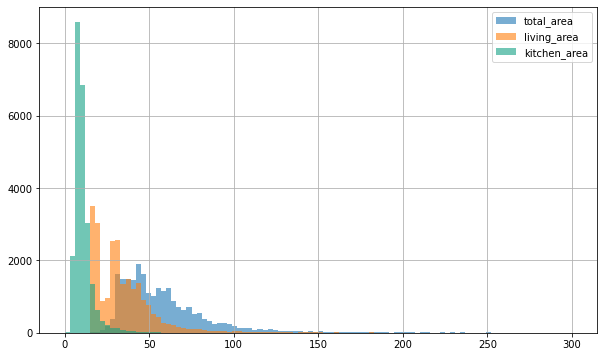

In [29]:
data['total_area'].hist( bins=100, range=(0, 300), figsize=(10,6), alpha=0.6, legend=True) #общая площадь
data['living_area'].hist(bins=100, range=(0, 300), figsize=(10,6), alpha=0.6,legend=True) #жилая площадь
data['kitchen_area'].hist(bins=100, range=(0, 300), figsize=(10,6), alpha=0.6,legend=True, color='#12a184') #площадь кухни

По графику мы можем наблюдать, обратно логорифмическую зависимость количества объявлений и стоимости объявлений. Дешевых объявлений больше!!!

<AxesSubplot:>

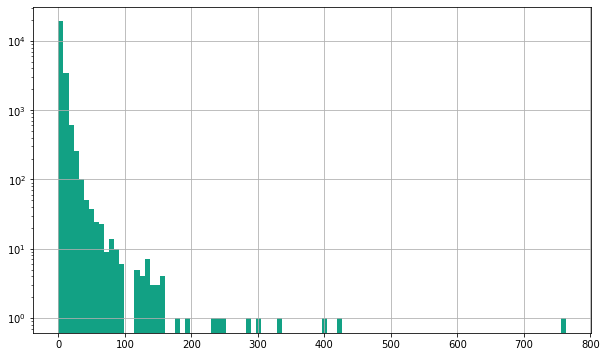

In [30]:
#к этому графику я применила параметр лог для того чтобы сделать логорифмический масштаб оси стоимости квартир
data['last_price'].div(1000000).hist(figsize=(10,6), color='#12a184', bins=100, log=True)

Больше всего объявленй в диапозоне от 1 до 3 комнат.

<AxesSubplot:>

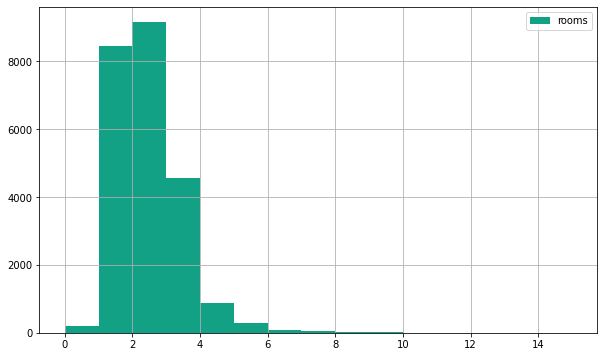

In [31]:
data['rooms'].hist(bins=15,figsize=(10,6), color='#12a184',legend=True)

Самая распространенная высота потолков 2.7 метров.

<AxesSubplot:>

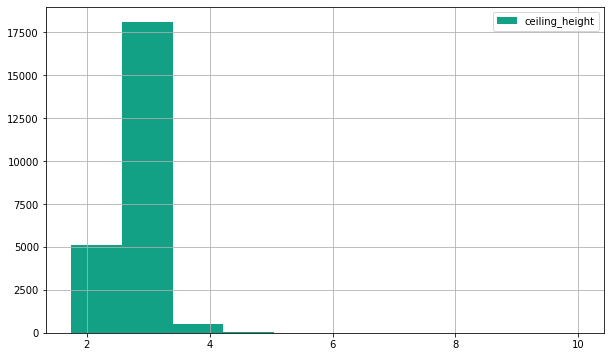

In [32]:
data['ceiling_height'].hist(bins=10,figsize=(10,6), color='#12a184',legend=True)

Много предложений покупки недвижимости в малоэтажной застройке. Это напрямую связано с текущей этажностью рынка жилья. На графике мы видим зависимость этажа квартиры из объявления и этажности домов в населенных пунктах

<AxesSubplot:>

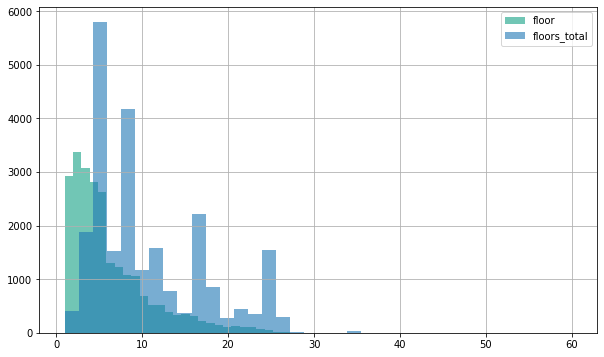

In [33]:
data['floor'].hist(bins=33, figsize=(10,6), alpha=0.6,legend=True, color='#12a184')
data['floors_total'].hist(bins=36, figsize=(10,6),alpha=0.6, legend=True)

На графике мы видим распределение предложений по этажам. На первом и последнем этаже меньше всего предложений по понятной причине, общую часть рынка занимают предложения с остальными этажами.

<AxesSubplot:>

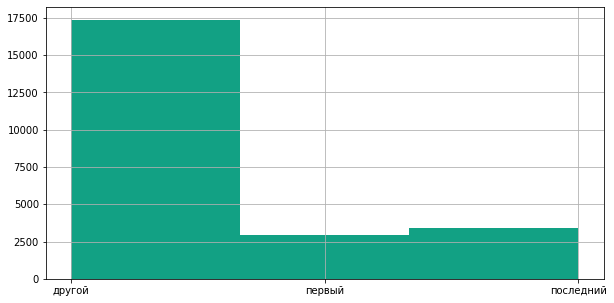

In [34]:
data['floor_type'].hist(bins=3, figsize=(10,5), color='#12a184')

Большую часть значений в этих столбцах, нам не удалось восстановить, поэтому график не может отражать достоверные данные. Но из тех данных, что у нас есть, мы можем сказать, что в каком населенном пункте мы бы не находились, парк находится в относительной близости, что не скажешь об аэропортах. Из некоторых точек придётся приодалеть расстояние аж 80км.

<AxesSubplot:>

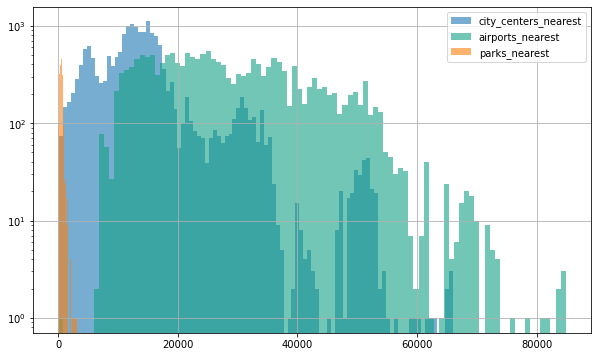

In [35]:
data['city_centers_nearest'].hist(bins=100,figsize=(10,6), alpha=0.6,legend=True, log=True)#расстояние до центра
data['airports_nearest'].hist(bins=100,figsize=(10,6), alpha=0.6,legend=True, log=True, color='#12a184')#расстояние до аэропопта
data['parks_nearest'].hist(bins=100,figsize=(10,6), alpha=0.6,legend=True, log=True)#расстояние до парка

По первому мы четко видим, то что чаще публикаются объявления в будние дни. Можно сделать предположение, что это связано с рабочим графиком риэлтора который занимается размещением объявлений. 

По второму графику мы видим, что чаще всего публикуются объявления с февраля по апрель, затем идёт резкий спад, а затем равномерный рост.

Text(0.5, 0, 'месяц в году')

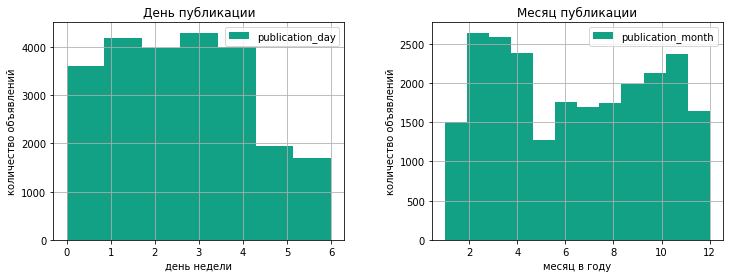

In [36]:
fig, axes = plt.subplots(1,2, figsize=(12, 4))

data.hist('publication_day',bins=7, ax=axes[0],color='#12a184',legend=True)#день публикации
data.hist('publication_month',bins=12, ax=axes[1],color='#12a184',legend=True) #месяц публикации

axes[0].set_title('День публикации') 
axes[1].set_title('Месяц публикации') 

axes[0].set_ylabel('количество объявлений')
axes[0].set_xlabel('день недели')

axes[1].set_ylabel('количество объявлений')
axes[1].set_xlabel('месяц в году')

---
***Изучите, как быстро продавались квартиры***

<AxesSubplot:>

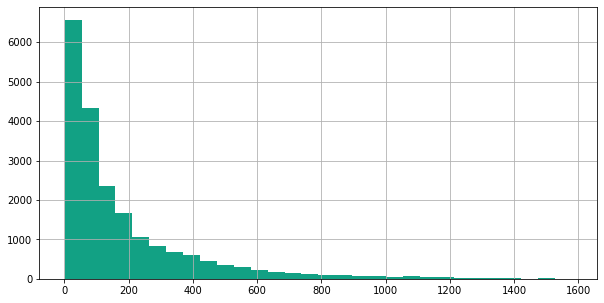

In [37]:
data['days_exposition'].hist(bins=30, figsize=(10,5), color='#12a184') #построим гистрограмму

In [38]:
print('среднее значение:', data['days_exposition'].mean()) #посчитаем среднее
print('медианное значение:',data['days_exposition'].median()) #посчитаем медиану

среднее значение: 180.88863436982163
медианное значение: 95.0


Сделаем гипотезу:

Продажа недвижимости чаще всего происходит в первое время после публикации объявления, также наблюдается обратная зависимость частоты продаж с течением времени

<AxesSubplot:>

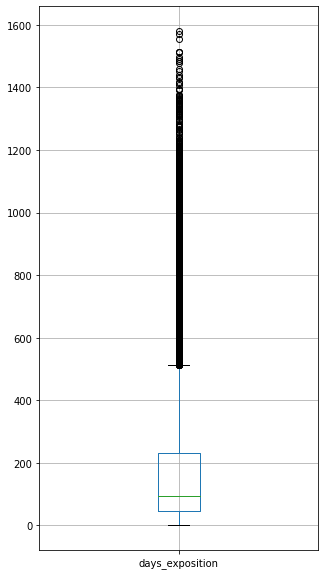

In [39]:
data.boxplot('days_exposition', figsize=(5,10))

По данной диаграмме размаха мы видим что начиная с 450 дня наблюдается диапозон редких значений. Чтобы сделать более точные выводы по данным, их нужно отфильтровать

<AxesSubplot:>

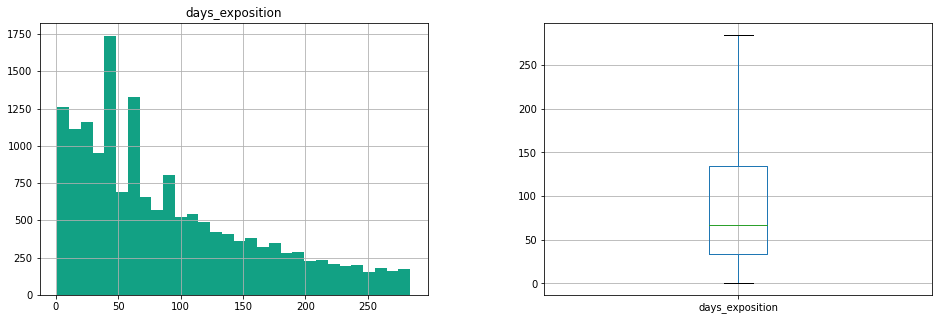

In [40]:
data_filter=data.query('days_exposition < 285') #подберем query gate для фильтрации - это позволит нам провести более четкй анализ
fig, axes = plt.subplots(1,2, figsize=(16, 5))
data_filter.hist('days_exposition',bins=30,ax=axes[0], color='#12a184') #построим гистрограмму
data_filter.boxplot('days_exposition',ax=axes[1])

По диаграмме размаха мы можем увидеть, что объявления которые провисели на сайте 285 дней и более являются выбросами, и могут искажать данные. 
Гипотеза подтверждена, продажи чаще происходят в первое время после публикации. Также можно сделать утверждение, что объявления переходящие за черту 285 дней не соответствуют запросам рынка.

---
***Какие факторы больше всего влияют на общую (полную) стоимость объекта?***

In [41]:
#создадим переменую с корелляцией столбоц которые нас интерисует
corr_data = data[['last_price','locality_name','total_area','living_area', 'kitchen_area','rooms', 'floor', 'publication_day', 'publication_month', 'publication_year']].copy().corr()
corr_data['last_price'] # выведем на экран корреляции с ценой

last_price           1.000000
total_area           0.597799
living_area          0.587123
kitchen_area         0.515936
rooms                0.373076
floor                0.026576
publication_day      0.001550
publication_month    0.002779
publication_year    -0.043089
Name: last_price, dtype: float64

По получившейся таблице мы видим, что цена напрямую зависит от общей площади, жилой площади, площади кухни и количества комнат. Всё остальное не влияет на цену недвижимости. Незначительно но может повлиять этаж на котором расположена квартира. А также можно заметить что с каждым годом объявление незначительно теряет в ликвидности.
Построим графики с самыми значительными факторами:

Выбирем самый показательный участок из выборки соотношения цены к общей площади квартиры:

Таким образом можем сказать, что основное поле предложений по общей площади квартир находится в интервале от 20 до 100 кв. метров, с соотношением цен до 3 миллионов.

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

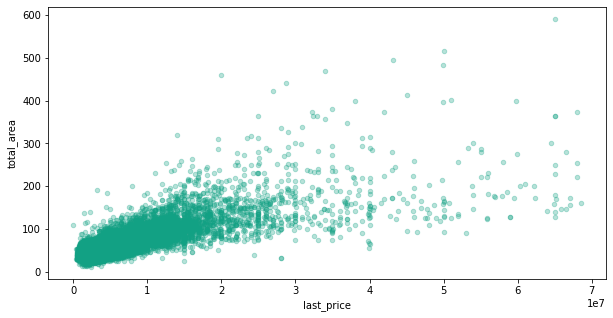

In [42]:
# взаимосвязь цены с общей площадью квартиры. с помощью query отбросим слишком большие значения 
data.query('last_price < 70000000').plot(x='last_price', y='total_area', kind='scatter', alpha=0.3,figsize=(10,5),color='#12a184') 

На этой диаграмме можем заметить, что большее поле предложений включает в себя от 5 до 100 кв. метров жилой площади, с соотношением цен до 2,5 миллионов.

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

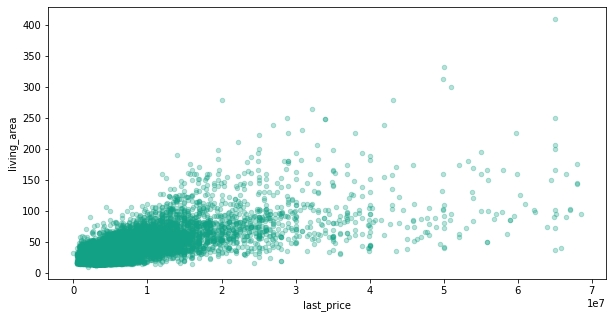

In [43]:
#взаимосвязь цены с жилой площадью
data.query('last_price < 70000000').plot(x='last_price', y='living_area', kind='scatter', alpha=0.3,figsize=(10,5),color='#12a184')

На диаграмме можем заметить, что большее поле предложений включает в себя от 5 до 25 кв. метров площади кухни, с соотношением цен до 2 миллионов.

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

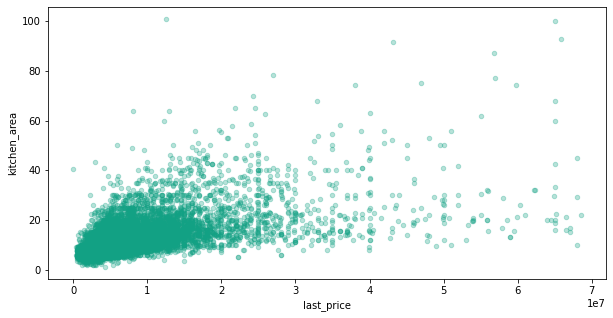

In [44]:
#взаимосвязь цены с кухонной площадью
data.query('last_price < 70000000').plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3,figsize=(10,5),color='#12a184') 

На графике мы видим, что цена имеет равномерный рост в зависимости от количества комнат. Однако есть просадки по цене в районе 9, 10, и 14 комнат. Вероятнее всего продавцы намеренно снижали цену чтобы поскорее продать квартиру.

<AxesSubplot:xlabel='rooms'>

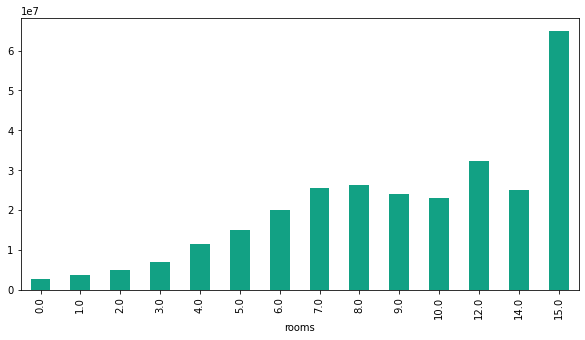

In [45]:
#взаимосвязь цены с количеством комнат
pd.pivot_table(data,index=['rooms'], aggfunc='median')['last_price'].plot.bar(x='last_price', y='rooms',figsize=(10,5),color='#12a184') 

По графику стоит отметить, что на первом этаже самые недорогие квартиры. Скорее всего это связано с тем, что на первых этажах не так комфортно жить как на остальных, так как может быть шумно или другие приколы. На последнем этаже недвижимость дешевле чем на других этажах. Это тоже может быть связано с тем, что крыша может протекать и могут быть лишние проблемы в проживании на последнем этаже.

<AxesSubplot:xlabel='floor_type'>

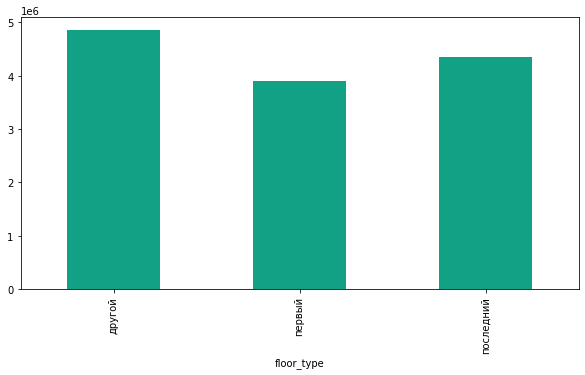

In [46]:
#взаимосвязь цены с категорией этажа
pd.pivot_table(data,index=['floor_type'], aggfunc='median')['last_price'].plot.bar(x='last_price', y='floor_type',figsize=(10,5),color='#12a184') 

По гистограмме мы видим, что в субботу квартиры продаются дороже всего. Стоит тут отметить, что это не коррелирует с количеством публикаций в день недели. Большая часть объявлений публикуется в будние дни. Также можно сказать, что цены растут параллельно с количеством публикации объявлений в среду и четверг.

<AxesSubplot:xlabel='publication_day_name'>

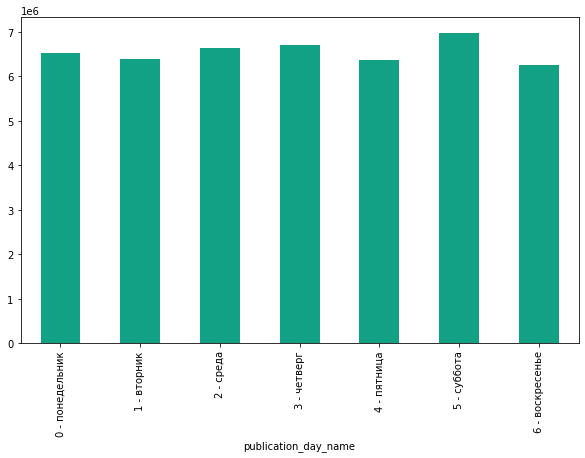

In [47]:
#взаимосвязь цены с днём недели публикации
data['publication_day_name'] = data['publication_day'].replace({
   0: '0 - понедельник', 1: '1 - вторник', 2: '2 - среда', 3: '3 - четверг', 4: '4 - пятница', 5: '5 - суббота', 6: '6 - воскресенье'
})
pd.pivot_table(data, index = ['publication_day_name'])['last_price'].plot.bar(x='publication_day_name', y='last_price',figsize=(10,6), color='#12a184')

По графику мы видим, что с декабря по январь рынок цен недвижимости растёт, затем наблюдается спад, и снова рост в апреле. Также высокие показатели стоимости квартир наблюдается в сентябре, а просадка цен наблюдается в июне, августе и октябре. Можно заметить синусоидную зависимость цен от времени, это может быть связано с тем, что при завышении цен рынок корректирует стоимость к актуальной.

<AxesSubplot:xlabel='publication_month'>

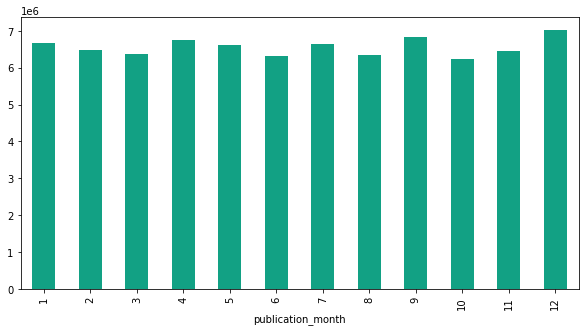

In [48]:
#взаимосвязь цены с месяцем публикации
pd.pivot_table(data, index = ['publication_month'])['last_price'].plot.bar(x='last_price', y='publication_month',figsize=(10,5),color='#12a184')

По гистограмме мы видим, что в 2014 году был пик высоких цен на недвижимость, затем вплоть до 2018 года на рынке наблюдается равномерный спад стоимости. В 2019 снова происходит небольшой рост цен.

<AxesSubplot:xlabel='publication_year'>

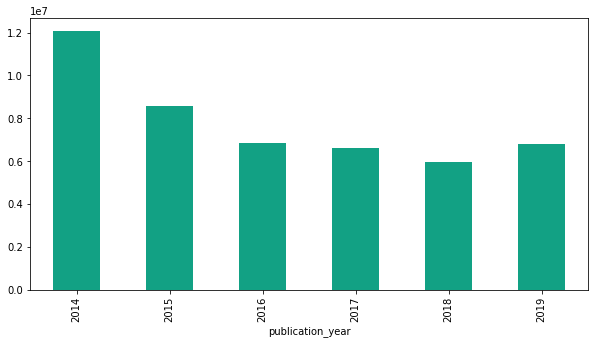

In [49]:
#взаимосвязь цены с годом публикации
pd.pivot_table(data, index = ['publication_year'])['last_price'].plot.bar(x='last_price', y='publication_year',figsize=(10,5),color='#12a184')

---
***Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.***

In [50]:
data['locality_name'].value_counts().head(10) #выводим 10 самых частых городов по количеству объявлений

санкт-петербург    15721
мурино               590
кудрово              472
шушары               440
всеволожск           398
пушкин               369
колпино              338
парголово            327
гатчина              307
выборг               237
Name: locality_name, dtype: int64

In [51]:
means_by_locality_name ={} #посчитаем среднюю стоимость кв метра в 10 самых популярных населенных пунктах

for t in data['locality_name'].value_counts().head(10).index:
    means_by_locality_name[t] = (data.loc[data['locality_name'] == t, 'last_price'] / data.loc[data['locality_name'] == t, 'total_area']).mean()

means_by_locality_name

{'санкт-петербург': 115916.75542754149,
 'мурино': 86087.51204970534,
 'кудрово': 95324.93054392203,
 'шушары': 78677.3642167513,
 'всеволожск': 68654.4739860316,
 'пушкин': 103125.81929072196,
 'колпино': 75424.57909803945,
 'парголово': 90175.91345801107,
 'гатчина': 68746.14676333922,
 'выборг': 58141.90915331862}

Самая высокая стоимость квадратного метра в Санкт-Петербурге - 115916 рублей за квадратный метр. Самая низкая стоимость в Выборге - 58141 рублей за квадратный метр.

---
***Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра.***

<AxesSubplot:xlabel='city_centers_nearest_km'>

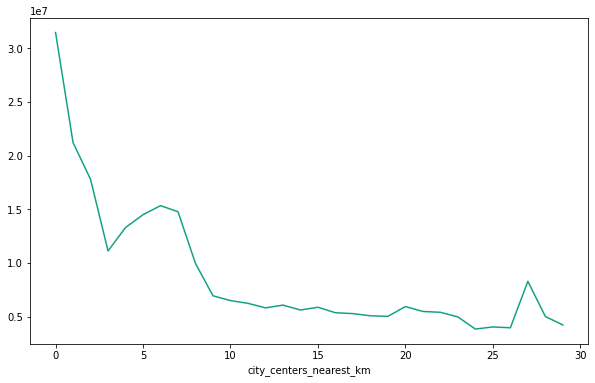

In [52]:
mean_price = data.query('locality_name == "санкт-петербург"').groupby('city_centers_nearest_km')['last_price'].mean()
mean_price.plot(figsize=(10,6),color='#12a184')

По графику мы видим, чем ближе квартира к центру тем выше её стоимость. Однако на графике мы можем увидеть просадку по цене в районе 3-4 км от центра, а затем снова рост. Это можно объяснить тем, что хоть район и находится недалеко от центра, в нём есть другие минусы, например там может не быть парков или магазинов в пешей доступности от дома. Такие районы хуже пригодны для жизни чем остальные.

Также мы можем увидеть рост в районе 25 км от центра. Данный пик может быть связан с хорошим качеством застройки данного района.

### Общий вывод

Стоит отметить, что данные полученные для проведения анализа подлежали предобработке. В контексте предобработки было произведено восстановление данных с учетом города каждого конкретного объявления, что позволило произвести более точный анализ рынка, поскольку между городами наблюдается принципиальная разница в поле критериев.

***Конкретнее, были восстановлены следующие значения объявлений:***

*1) Высота потолков*

*2) Общая этажность зданий*

*3) Общая площадь помещения - это возможно поскольку мы можем отталкиваться от жилой площади, от средней площади по нас. пункту.*

*4) Площадь кухни - аналогично общей площади*

Также, были удалены неявные дубликаты, исправлены типы данных и устранены аномальные значения.


***Для более подробного анализа и работы с данными, были созданы дополнительные столбцы:***

*1) Цена одного кв. метра*

*2) День недели публикации обявлений*

*3) Месяц публикации объявления*

*4) Год публикации объявления*

*5) Категория этажа квартиры*

*6) Расстояние до центра города в км.*


Подобная предобработка позволила нам определить взаимосвязи между критериями объявлений. Посмотрим на зависимость стоимости квартиры, и отметим подтверждённые в процессе работы гипотезы:

1) ***Площадь недвижимости***
Стоимость квартиры напрямую связано с общей, жилой и кухонной площадью. Чем больше площадь, тем дороже квартира.

2) ***Количество комнат***
Стоимость квартиры напрямую зависит от количества комнат. Чем больше комнат, тем больше площадь квартиры. Следовательно, и цена выше.

3)  ***Категория этажа***
На первом и последнем этаже меньше всего предложений, а также цена квартир на этих этажах занижена по отношению к остальному рынку. Общую часть рынка занимают предложения с остальными этажами.

4) ***Удаленность от центра***
Стоимость квартиры напрямую связана с удолённостью от центра города, чем ближе к центру тем дороже. Хорошая инфраструктура  увеличивает цену на недвижимость.

5) ***Длительность размещения объявления***
Квартиры чаще продаются в первое время после публикации. Квартиры которые продаются дольше 285 дней, теряют актуальность.

6) ***День недели размещения объявдения***
Объявления на квартиры чаще публикуются в будние дни. Пик публикации приходится на период с февраля по апрель. Меньше всего публикуют объявления в летнее время.

7) ***Стоимость в зависимости от дня недели размещения объявления***
В субботу квартиры продаются по максимальной цене в соотношении с остальными днями. Также хороший рост стоимости наблюдается в среду и четверг.

8) ***Стоимость в зависимости от месяца размещения объявления***
С декабря по январь стоимость рынка недвижимости растёт, затем наблюдается спад, и снова рост в апреле. Также высокие показатели стоимости квартир наблюдается в сентябре.

9) ***Стоимость в зависимости от года размещения объявления***
В 2014 году наблюдается пик высоких цен на недвижимость, затем вплоть до 2018 года на рынке равномерный спад стоимости. В 2019 снова происходит небольшой рост цен.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод